In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='coarse')

169001437/169001437 [==============================] - 6s 0us/step


In [3]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, shuffle=True)

In [4]:

X_train.shape, X_val.shape, X_test.shape

((42500, 32, 32, 3), (7500, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
X_train = X_train/255.0
X_val = X_val/255.0
X_test = X_test/255.0

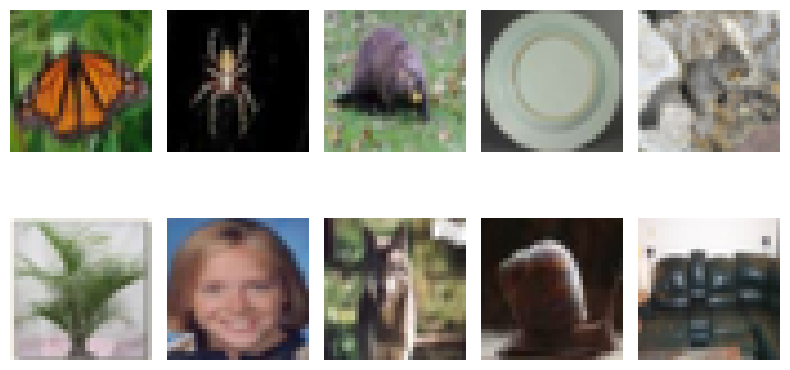

In [6]:
num_images = 10

# Plot the images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(8, 5))
for i, ax in zip(range(num_images), axes.ravel()):
  ax.imshow(X_train[i])
  ax.axis('off')
plt.tight_layout()
plt.show()
     


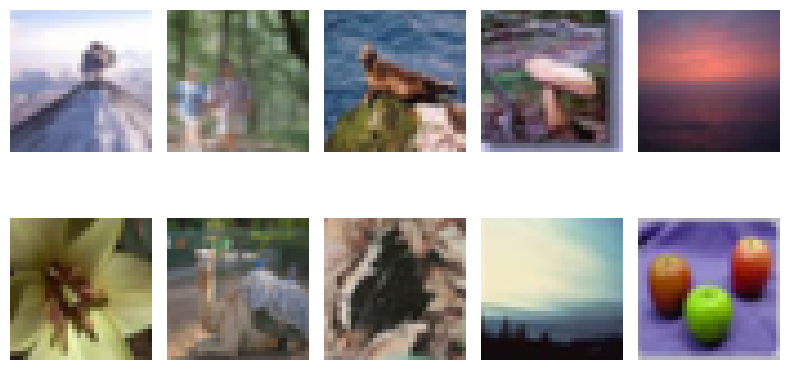

In [7]:
num_images = 10

# Plot the images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(8, 5))
for i, ax in zip(range(num_images), axes.ravel()):
  ax.imshow(X_test[i])
  ax.axis('off')
plt.tight_layout()
plt.show()

In [8]:
num_epochs = 30
batch_size = 32

In [9]:
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=20)

In [10]:
# Model without regularization

model_ = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Compile model
model_.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train model
history_ = model_.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), batch_size=batch_size)

Epoch 1/30
1329/1329 [==============================] - 20s 6ms/step - loss: 2.4785 - accuracy: 0.2283 - val_loss: 2.1833 - val_accuracy: 0.3192
Epoch 2/30
1329/1329 [==============================] - 8s 6ms/step - loss: 2.0564 - accuracy: 0.3580 - val_loss: 1.9975 - val_accuracy: 0.3827
Epoch 3/30
1329/1329 [==============================] - 7s 6ms/step - loss: 1.8233 - accuracy: 0.4321 - val_loss: 1.8087 - val_accuracy: 0.4427
Epoch 4/30
1329/1329 [==============================] - 8s 6ms/step - loss: 1.6411 - accuracy: 0.4869 - val_loss: 1.7482 - val_accuracy: 0.4629
Epoch 5/30
1329/1329 [==============================] - 8s 6ms/step - loss: 1.4826 - accuracy: 0.5316 - val_loss: 1.6809 - val_accuracy: 0.4885
Epoch 6/30
1329/1329 [==============================] - 7s 5ms/step - loss: 1.3378 - accuracy: 0.5746 - val_loss: 1.6608 - val_accuracy: 0.4992
Epoch 7/30
1329/1329 [==============================] - 8s 6ms/step - loss: 1.1939 - accuracy: 0.6172 - val_loss: 1.7023 - val_accuracy

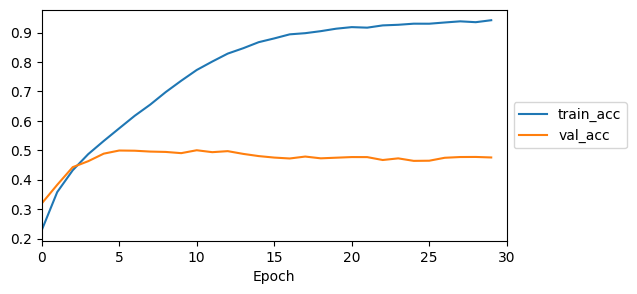

In [11]:
pd.DataFrame(history_.history)[['accuracy', 'val_accuracy']].rename(columns={'accuracy':'train_acc', 'val_accuracy':'val_acc'}).plot(figsize=(6, 3), xlim=[0, num_epochs], xlabel='Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [12]:

# Evaluate model on test set

y_pred_ = model_.predict(X_test)
y_pred_ = np.argmax(y_pred_, axis=1)
acc_ = tf.keras.metrics.Accuracy()(y_test, y_pred_).numpy()
print('Base model accuracy:', acc_)

313/313 [==============================] - 1s 2ms/step
Base model accuracy: 0.4615


##L1 L2 regularization

In [13]:
model_l1l2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
    tf.keras.layers.Dense(100, activation='relu', ),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Compile model
model_l1l2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train model
history_l1l2 = model_l1l2.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), batch_size=batch_size)

Epoch 1/30
1329/1329 [==============================] - 11s 6ms/step - loss: 3.1087 - accuracy: 0.1452 - val_loss: 2.6580 - val_accuracy: 0.1899
Epoch 2/30
1329/1329 [==============================] - 9s 6ms/step - loss: 2.6045 - accuracy: 0.2121 - val_loss: 2.5560 - val_accuracy: 0.2331
Epoch 3/30
1329/1329 [==============================] - 7s 6ms/step - loss: 2.5038 - accuracy: 0.2487 - val_loss: 2.4628 - val_accuracy: 0.2559
Epoch 4/30
1329/1329 [==============================] - 8s 6ms/step - loss: 2.4256 - accuracy: 0.2720 - val_loss: 2.3979 - val_accuracy: 0.2879
Epoch 5/30
1329/1329 [==============================] - 8s 6ms/step - loss: 2.3688 - accuracy: 0.2911 - val_loss: 2.3507 - val_accuracy: 0.3096
Epoch 6/30
1329/1329 [==============================] - 7s 6ms/step - loss: 2.3183 - accuracy: 0.3034 - val_loss: 2.3656 - val_accuracy: 0.2947
Epoch 7/30
1329/1329 [==============================] - 8s 6ms/step - loss: 2.2779 - accuracy: 0.3188 - val_loss: 2.2864 - val_accuracy

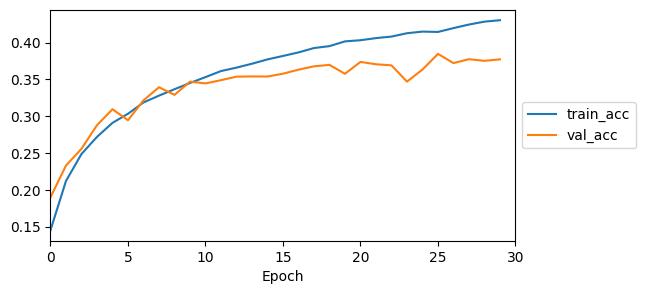

In [14]:
pd.DataFrame(history_l1l2.history)[['accuracy', 'val_accuracy']].rename(columns={'accuracy':'train_acc', 'val_accuracy':'val_acc'}).plot(figsize=(6, 3), xlim=[0, num_epochs], xlabel='Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [15]:
y_pred_l1l2 = model_l1l2.predict(X_test)
y_pred_l1l2 = np.argmax(y_pred_l1l2, axis=1)
acc_l1l2 = tf.keras.metrics.Accuracy()(y_test, y_pred_l1l2).numpy()
print('Model accuracy with L1 L2 regularization:', acc_l1l2)

313/313 [==============================] - 1s 2ms/step
Model accuracy with L1 L2 regularization: 0.3682


##Dropout

In [16]:
model_dropout = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Compile model
model_dropout.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train model
history_dropout = model_dropout.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), batch_size=batch_size)
     

Epoch 1/30
1329/1329 [==============================] - 11s 7ms/step - loss: 2.5883 - accuracy: 0.1920 - val_loss: 2.3083 - val_accuracy: 0.2983
Epoch 2/30
1329/1329 [==============================] - 8s 6ms/step - loss: 2.2365 - accuracy: 0.3066 - val_loss: 2.1100 - val_accuracy: 0.3472
Epoch 3/30
1329/1329 [==============================] - 8s 6ms/step - loss: 2.0682 - accuracy: 0.3579 - val_loss: 1.9355 - val_accuracy: 0.4045
Epoch 4/30
1329/1329 [==============================] - 8s 6ms/step - loss: 1.9482 - accuracy: 0.3944 - val_loss: 1.8408 - val_accuracy: 0.4380
Epoch 5/30
1329/1329 [==============================] - 8s 6ms/step - loss: 1.8670 - accuracy: 0.4216 - val_loss: 1.8295 - val_accuracy: 0.4327
Epoch 6/30
1329/1329 [==============================] - 8s 6ms/step - loss: 1.7992 - accuracy: 0.4392 - val_loss: 1.7723 - val_accuracy: 0.4515
Epoch 7/30
1329/1329 [==============================] - 9s 6ms/step - loss: 1.7340 - accuracy: 0.4581 - val_loss: 1.7484 - val_accuracy

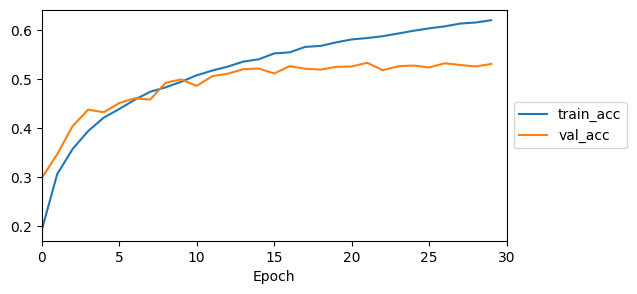

In [17]:
pd.DataFrame(history_dropout.history)[['accuracy', 'val_accuracy']].rename(columns={'accuracy':'train_acc', 'val_accuracy':'val_acc'}).plot(figsize=(6, 3), xlim=[0, num_epochs], xlabel='Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [18]:
# Evaluate model on test set

y_pred_dropout = model_dropout.predict(X_test)
y_pred_dropout = np.argmax(y_pred_dropout, axis=1)
acc_dropout = tf.keras.metrics.Accuracy()(y_test, y_pred_dropout).numpy()
print('Model accuracy with Dropout:', acc_dropout)

313/313 [==============================] - 1s 2ms/step
Model accuracy with Dropout: 0.5342


##Early Stopping

In [19]:
model_es = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Compile model
model_es.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Early stopping
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=1)

# Train model
history_es = model_es.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=batch_size, callbacks=[early_stopping_cb])

Epoch 1/10
1329/1329 [==============================] - 10s 6ms/step - loss: 2.4972 - accuracy: 0.2209 - val_loss: 2.2061 - val_accuracy: 0.3221
Epoch 2/10
1329/1329 [==============================] - 8s 6ms/step - loss: 2.0872 - accuracy: 0.3521 - val_loss: 1.9360 - val_accuracy: 0.3995
Epoch 3/10
1329/1329 [==============================] - 10s 8ms/step - loss: 1.8424 - accuracy: 0.4219 - val_loss: 1.8552 - val_accuracy: 0.4299
Epoch 4/10
1329/1329 [==============================] - 15s 11ms/step - loss: 1.6629 - accuracy: 0.4784 - val_loss: 1.7525 - val_accuracy: 0.4577
Epoch 5/10
1329/1329 [==============================] - 8s 6ms/step - loss: 1.5154 - accuracy: 0.5218 - val_loss: 1.6902 - val_accuracy: 0.4771
Epoch 6/10
1329/1329 [==============================] - 8s 6ms/step - loss: 1.3822 - accuracy: 0.5640 - val_loss: 1.7587 - val_accuracy: 0.4724


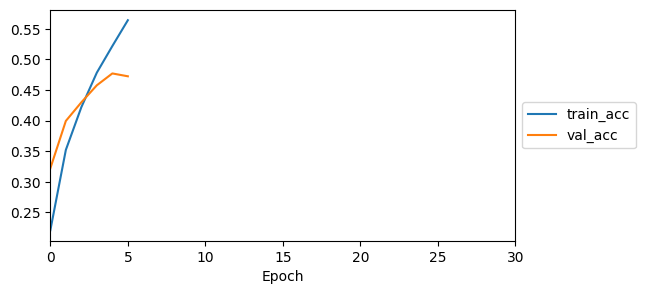

In [20]:
pd.DataFrame(history_es.history)[['accuracy', 'val_accuracy']].rename(columns={'accuracy':'train_acc', 'val_accuracy':'val_acc'}).plot(figsize=(6, 3), xlim=[0, num_epochs], xlabel='Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [21]:
# Evaluate model on test set

y_pred_es = model_es.predict(X_test)
y_pred_es = np.argmax(y_pred_es, axis=1)
acc_es = tf.keras.metrics.Accuracy()(y_test, y_pred_es).numpy()
print('Model accuracy with early stopping:', acc_es)
     

313/313 [==============================] - 1s 2ms/step
Model accuracy with early stopping: 0.475


##Monte Carlo Dropout

In [22]:
model_mc = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Lambda(lambda x: tf.keras.backend.expand_dims(x, axis=1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Lambda(lambda x: tf.keras.backend.expand_dims(x, axis=1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Compile model
model_mc.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train model
history_mc = model_mc.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), batch_size=batch_size)

Epoch 1/30
1329/1329 [==============================] - 13s 8ms/step - loss: 2.6063 - accuracy: 0.0541 - val_loss: 2.3697 - val_accuracy: 0.0571
Epoch 2/30
1329/1329 [==============================] - 10s 8ms/step - loss: 2.2478 - accuracy: 0.0579 - val_loss: 2.1377 - val_accuracy: 0.0598
Epoch 3/30
1329/1329 [==============================] - 10s 7ms/step - loss: 2.0568 - accuracy: 0.0597 - val_loss: 1.9519 - val_accuracy: 0.0618
Epoch 4/30
1329/1329 [==============================] - 10s 8ms/step - loss: 1.9103 - accuracy: 0.0609 - val_loss: 1.8991 - val_accuracy: 0.0625
Epoch 5/30
1329/1329 [==============================] - 10s 8ms/step - loss: 1.7897 - accuracy: 0.0624 - val_loss: 1.8962 - val_accuracy: 0.0622
Epoch 6/30
1329/1329 [==============================] - 10s 8ms/step - loss: 1.6889 - accuracy: 0.0634 - val_loss: 1.8192 - val_accuracy: 0.0636
Epoch 7/30
1329/1329 [==============================] - 10s 8ms/step - loss: 1.5910 - accuracy: 0.0640 - val_loss: 1.7669 - val_ac

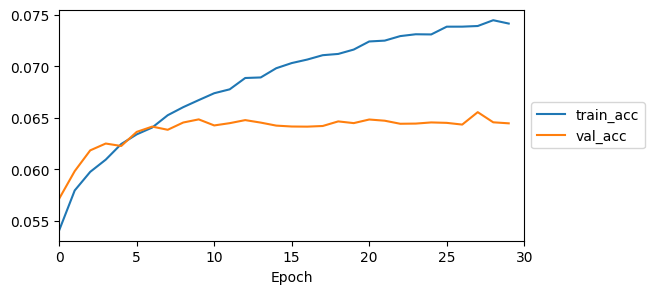

In [23]:
pd.DataFrame(history_mc.history)[['accuracy', 'val_accuracy']].rename(columns={'accuracy':'train_acc', 'val_accuracy':'val_acc'}).plot(figsize=(6, 3), xlim=[0, num_epochs], xlabel='Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
     

In [24]:
# Define Monte Carlo Dropout function
def monte_carlo_dropout(model, X, n=50):
    y_prob = []
    for i in range(n):
        y_prob.append(model.predict(X))
    y_prob = tf.stack(y_prob, axis=0)
    y_prob = tf.reduce_mean(y_prob, axis=0)
    y_pred = tf.argmax(y_prob, axis=1)
    return y_pred

# Evaluate model with Monte Carlo Dropout
sample_indices = np.random.choice(X_test.shape[0], size=1000, replace=False)
X_test_sample = X_test[sample_indices]
y_test_sample = y_test[sample_indices]

y_pred_mc = monte_carlo_dropout(model_mc, X_test_sample)
y_pred_mc = tf.squeeze(y_pred_mc)
y_pred_mc = np.argmax(y_pred_mc, axis=1)
acc_mc = tf.keras.metrics.Accuracy()(y_test_sample, y_pred_mc).numpy()
print('Accuracy with Monte Carlo Dropout:', acc_mc)

32/32 [==============================] - 0s 3ms/step
Accuracy with Monte Carlo Dropout: 0.042


##Batch Normalization

In [25]:
model_bn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Compile model
model_bn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train model
history_bn = model_bn.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), batch_size=batch_size)

Epoch 1/30
1329/1329 [==============================] - 16s 8ms/step - loss: 2.2431 - accuracy: 0.3121 - val_loss: 2.2062 - val_accuracy: 0.3240
Epoch 2/30
1329/1329 [==============================] - 10s 8ms/step - loss: 1.7834 - accuracy: 0.4437 - val_loss: 1.7971 - val_accuracy: 0.4379
Epoch 3/30
1329/1329 [==============================] - 11s 8ms/step - loss: 1.5506 - accuracy: 0.5154 - val_loss: 1.8435 - val_accuracy: 0.4349
Epoch 4/30
1329/1329 [==============================] - 11s 8ms/step - loss: 1.3454 - accuracy: 0.5743 - val_loss: 1.7009 - val_accuracy: 0.4856
Epoch 5/30
1329/1329 [==============================] - 11s 8ms/step - loss: 1.1612 - accuracy: 0.6302 - val_loss: 1.7232 - val_accuracy: 0.4935
Epoch 6/30
1329/1329 [==============================] - 11s 8ms/step - loss: 1.0027 - accuracy: 0.6808 - val_loss: 1.9520 - val_accuracy: 0.4752
Epoch 7/30
1329/1329 [==============================] - 12s 9ms/step - loss: 0.8414 - accuracy: 0.7293 - val_loss: 1.7619 - val_ac

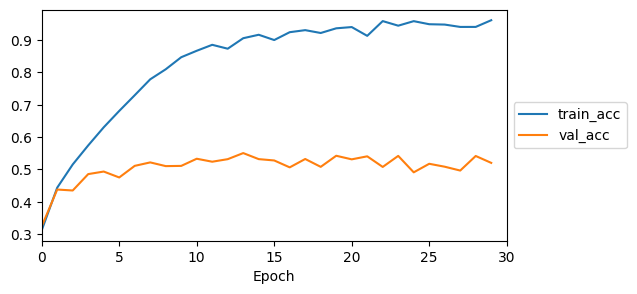

In [26]:
pd.DataFrame(history_bn.history)[['accuracy', 'val_accuracy']].rename(columns={'accuracy':'train_acc', 'val_accuracy':'val_acc'}).plot(figsize=(6, 3), xlim=[0, num_epochs], xlabel='Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [27]:
# Evaluate model on test set

y_pred_bn = model_bn.predict(X_test)
y_pred_bn = np.argmax(y_pred_bn, axis=1)
acc_bn = tf.keras.metrics.Accuracy()(y_test, y_pred_bn).numpy()
print('Model accuracy with batch normalization:', acc_bn)

313/313 [==============================] - 1s 3ms/step
Model accuracy with batch normalization: 0.5393


##CustomDropout

In [28]:
class CustomDropout(tf.keras.layers.Layer):
    def __init__(self, rate):
      super(CustomDropout, self).__init__()
      self.rate = rate
        
    def call(self, inputs, training=None):
      if training:
        mask = tf.random.uniform(shape=tf.shape(inputs), minval=0.0, maxval=1.0) >= self.rate
        mask = tf.cast(mask, dtype=inputs.dtype)
        output = inputs * mask
      else:
        output = inputs
        
      return output

In [29]:
model_custom_dropout = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    CustomDropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    CustomDropout(0.2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    CustomDropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    CustomDropout(0.2),
    tf.keras.layers.Dense(100, activation='relu'),
    CustomDropout(0.2),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Compile model
model_custom_dropout.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train model
history_custom_dropout = model_custom_dropout.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), batch_size=batch_size)

Epoch 1/30
1329/1329 [==============================] - 11s 7ms/step - loss: 2.6310 - accuracy: 0.1767 - val_loss: 2.7923 - val_accuracy: 0.2553
Epoch 2/30
1329/1329 [==============================] - 7s 6ms/step - loss: 2.3282 - accuracy: 0.2761 - val_loss: 2.6955 - val_accuracy: 0.3284
Epoch 3/30
1329/1329 [==============================] - 8s 6ms/step - loss: 2.1463 - accuracy: 0.3369 - val_loss: 2.7895 - val_accuracy: 0.3620
Epoch 4/30
1329/1329 [==============================] - 8s 6ms/step - loss: 2.0238 - accuracy: 0.3742 - val_loss: 2.4963 - val_accuracy: 0.4045
Epoch 5/30
1329/1329 [==============================] - 8s 6ms/step - loss: 1.9124 - accuracy: 0.4085 - val_loss: 2.2094 - val_accuracy: 0.4457
Epoch 6/30
1329/1329 [==============================] - 8s 6ms/step - loss: 1.8324 - accuracy: 0.4300 - val_loss: 2.3033 - val_accuracy: 0.4500
Epoch 7/30
1329/1329 [==============================] - 8s 6ms/step - loss: 1.7712 - accuracy: 0.4504 - val_loss: 2.3013 - val_accuracy

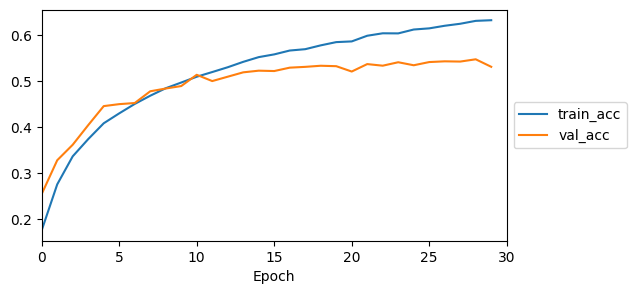

In [30]:

pd.DataFrame(history_custom_dropout.history)[['accuracy', 'val_accuracy']].rename(columns={'accuracy':'train_acc', 'val_accuracy':'val_acc'}).plot(figsize=(6, 3), xlim=[0, num_epochs], xlabel='Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
     

In [31]:

# Evaluate model on test set

y_pred_custom_dropout = model_custom_dropout.predict(X_test)
y_pred_custom_dropout = np.argmax(y_pred_custom_dropout, axis=1)
acc_custom_dropout = tf.keras.metrics.Accuracy()(y_test, y_pred_custom_dropout).numpy()
print('Model accuracy with custom dropout:', acc_custom_dropout)

313/313 [==============================] - 1s 2ms/step
Model accuracy with custom dropout: 0.5417


##Custom regularization

In [32]:
def custom_regularizer(weight_matrix):
    return tf.reduce_sum(tf.abs(tf.square(weight_matrix))) * 0.001

In [33]:
model_custom_reg = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=custom_regularizer),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=custom_regularizer),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=custom_regularizer),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Compile model
model_custom_reg.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train model
history_custom_reg = model_custom_reg.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), batch_size=batch_size)

Epoch 1/30
1329/1329 [==============================] - 10s 6ms/step - loss: 2.6375 - accuracy: 0.1816 - val_loss: 2.4582 - val_accuracy: 0.2471
Epoch 2/30
1329/1329 [==============================] - 8s 6ms/step - loss: 2.3292 - accuracy: 0.2842 - val_loss: 2.2392 - val_accuracy: 0.3267
Epoch 3/30
1329/1329 [==============================] - 8s 6ms/step - loss: 2.1657 - accuracy: 0.3403 - val_loss: 2.0886 - val_accuracy: 0.3729
Epoch 4/30
1329/1329 [==============================] - 7s 6ms/step - loss: 2.0348 - accuracy: 0.3876 - val_loss: 2.0279 - val_accuracy: 0.3971
Epoch 5/30
1329/1329 [==============================] - 8s 6ms/step - loss: 1.9330 - accuracy: 0.4203 - val_loss: 1.9521 - val_accuracy: 0.4233
Epoch 6/30
1329/1329 [==============================] - 8s 6ms/step - loss: 1.8419 - accuracy: 0.4497 - val_loss: 1.9332 - val_accuracy: 0.4316
Epoch 7/30
1329/1329 [==============================] - 8s 6ms/step - loss: 1.7648 - accuracy: 0.4767 - val_loss: 1.8309 - val_accuracy

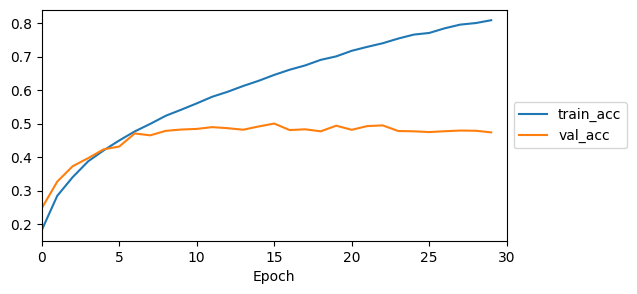

In [34]:

pd.DataFrame(history_custom_reg.history)[['accuracy', 'val_accuracy']].rename(columns={'accuracy':'train_acc', 'val_accuracy':'val_acc'}).plot(figsize=(6, 3), xlim=[0, num_epochs], xlabel='Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [35]:
# Evaluate model on test set

y_pred_custom_reg = model_custom_reg.predict(X_test)
y_pred_custom_reg = np.argmax(y_pred_custom_reg, axis=1)
acc_custom_reg = tf.keras.metrics.Accuracy()(y_test, y_pred_custom_reg).numpy()
print('Model accuracy with custom regularization:', acc_custom_reg)

313/313 [==============================] - 1s 2ms/step
Model accuracy with custom regularization: 0.4725
